# 1. **`2_lowest_gdp_growth_trends.ipynb`**
   - **Problem**: Analyze GDP growth rates over time for top economies to identify economic trends.
   - **Dataset**: `world_gdp_data.csv`
   - **Tasks**: Calculate Lowest yearly growth rates, filter bottom 10 countries, visualize trends with line plots.
   - **Skills**: Time-series (`to_datetime`, `resample`), filtering (`query`), visualization (`df.plot`).
   - **Output**: `data/processed/lowest_gdp_growth_trends.png`, line plot PNG.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [7]:
gdp = pd.read_csv("../data/raw/world_gdp_data.csv")
gdp.sample(5)

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
34,Chile,Annual GDP growth (percent change),7.9,6.2,-13.6,-2.8,5.9,2.0,5.6,6.6,...,2.2,1.8,1.4,4.0,0.7,-6.1,11.7,2.4,-0.5,1.6
83,Kazakhstan,Annual GDP growth (percent change),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.9,3.9,4.1,4.5,-2.6,4.1,3.3,4.6,4.2
61,Germany,Annual GDP growth (percent change),1.3,0.1,-0.8,1.6,2.8,2.2,2.4,1.5,...,1.5,2.2,2.7,1.0,1.1,-3.8,3.2,1.8,-0.5,0.9
105,Mauritania,Annual GDP growth (percent change),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,1.3,6.3,4.8,5.4,-0.9,2.4,6.5,4.5,5.3
88,Kuwait,Annual GDP growth (percent change),NaN,NaN,-9.5,5.3,5.2,-4.3,8.6,8.1,...,0.6,2.9,-4.7,2.4,-0.6,-8.9,1.1,8.9,-0.6,3.6


### Filter data.
1. the indicater is `Annual GDP growth (percent change)` so we need to calculate the growth rate for over the years. we need to sum the growth rate over the years for each country.
2. we need to filter the bottom 10 countries by Sum of GDP growth rate.



In [8]:
gdp['sum_gdp'] = gdp.loc[:, '1980':'2024'].sum(axis=1)

gdp.dropna(inplace=True)

filtered_gdp = gdp.sort_values(by='sum_gdp', ascending=False).tail(10)

filtered_gdp


,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,sum_gdp
32,Central African Republic,Annual GDP growth (percent change),-3.0,13.0,-3.6,-6.0,9.9,3.7,7.2,0.0,...,4.7,4.5,3.8,3.0,1.0,1.0,0.5,1.0,2.5,60.9
25,Bulgaria,Annual GDP growth (percent change),5.7,5.3,4.2,3.0,4.6,1.8,5.3,4.7,...,3.0,2.8,2.7,4.0,-4.0,7.6,3.4,1.7,3.2,59.8
80,Jamaica,Annual GDP growth (percent change),-4.0,4.4,3.1,4.2,0.9,-0.9,7.0,7.7,...,1.5,0.7,1.8,1.0,-9.9,4.6,5.2,2.0,1.8,55.3
79,Italy,Annual GDP growth (percent change),3.1,0.6,0.2,0.9,3.0,2.6,2.7,3.1,...,1.3,1.7,0.9,0.5,-9.0,7.0,3.7,0.7,0.7,49.4
63,Greece,Annual GDP growth (percent change),0.7,-1.6,-1.1,-1.1,2.0,2.5,0.5,-2.3,...,-0.5,1.1,1.7,1.9,-9.0,8.4,5.9,2.5,2.0,45.3
160,Suriname,Annual GDP growth (percent change),-6.5,1.9,-6.3,-5.1,-3.0,-0.9,-2.4,-8.8,...,-4.9,1.6,4.9,1.1,-15.9,-2.7,1.0,2.1,3.0,40.8
15,Barbados,Annual GDP growth (percent change),4.4,-1.9,-4.9,0.5,3.6,1.1,5.1,2.6,...,2.5,0.5,-0.6,-0.5,-13.3,-0.2,9.8,4.5,3.9,40.3
68,Haiti,Annual GDP growth (percent change),7.3,1.1,-2.8,-1.5,0.2,0.8,0.3,-0.4,...,1.8,2.5,1.7,-1.7,-3.3,-1.8,-1.7,-1.5,1.4,36.2
94,Libya,Annual GDP growth (percent change),0.6,-20.0,1.5,-4.7,-8.3,0.6,-11.4,-14.7,...,-1.5,32.5,7.9,-11.2,-29.5,28.3,-9.6,12.5,7.5,30.4
184,Venezuela,Annual GDP growth (percent change),-4.9,-1.3,2.6,-9.9,5.2,0.9,6.1,4.8,...,-17.0,-15.7,-19.7,-27.7,-30.0,1.0,8.0,4.0,4.5,-32.4


### Clean data
1. where gdp is not available then replace with mean of those country gdp

In [9]:
filtered_gdp.fillna(filtered_gdp.loc[:, '1980':'2024'].mean(), inplace=True)
filtered_gdp.set_index('country_name', inplace=True)
print(filtered_gdp.columns)
print(filtered_gdp.index)

filtered_gdp

Index(['indicator_name', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024', 'sum_gdp'],
      dtype='object')
Index(['Central African Republic', 'Bulgaria', 'Jamaica', 'Italy', 'Greece',
       'Suriname', 'Barbados', 'Haiti', 'Libya', 'Venezuela'],
      dtype='object', name='country_name')


,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,sum_gdp
country_name,,,,,,,,,,,,,,,,,,,,,
Central African Republic,Annual GDP growth (percent change),-3.0,13.0,-3.6,-6.0,9.9,3.7,7.2,0.0,1.7,...,4.7,4.5,3.8,3.0,1.0,1.0,0.5,1.0,2.5,60.9
Bulgaria,Annual GDP growth (percent change),5.7,5.3,4.2,3.0,4.6,1.8,5.3,4.7,2.4,...,3.0,2.8,2.7,4.0,-4.0,7.6,3.4,1.7,3.2,59.8
Jamaica,Annual GDP growth (percent change),-4.0,4.4,3.1,4.2,0.9,-0.9,7.0,7.7,-4.0,...,1.5,0.7,1.8,1.0,-9.9,4.6,5.2,2.0,1.8,55.3
Italy,Annual GDP growth (percent change),3.1,0.6,0.2,0.9,3.0,2.6,2.7,3.1,4.0,...,1.3,1.7,0.9,0.5,-9.0,7.0,3.7,0.7,0.7,49.4
Greece,Annual GDP growth (percent change),0.7,-1.6,-1.1,-1.1,2.0,2.5,0.5,-2.3,4.3,...,-0.5,1.1,1.7,1.9,-9.0,8.4,5.9,2.5,2.0,45.3
Suriname,Annual GDP growth (percent change),-6.5,1.9,-6.3,-5.1,-3.0,-0.9,-2.4,-8.8,10.8,...,-4.9,1.6,4.9,1.1,-15.9,-2.7,1.0,2.1,3.0,40.8
Barbados,Annual GDP growth (percent change),4.4,-1.9,-4.9,0.5,3.6,1.1,5.1,2.6,3.5,...,2.5,0.5,-0.6,-0.5,-13.3,-0.2,9.8,4.5,3.9,40.3
Haiti,Annual GDP growth (percent change),7.3,1.1,-2.8,-1.5,0.2,0.8,0.3,-0.4,0.6,...,1.8,2.5,1.7,-1.7,-3.3,-1.8,-1.7,-1.5,1.4,36.2
Libya,Annual GDP growth (percent change),0.6,-20.0,1.5,-4.7,-8.3,0.6,-11.4,-14.7,7.6,...,-1.5,32.5,7.9,-11.2,-29.5,28.3,-9.6,12.5,7.5,30.4


### Visualization for this statuistics

#### 1. Line chart for  GDP growth rate over time for top 10 countries.

- on x axis we have years
- on y axis we have GDP growth rate
- with line colors for each country

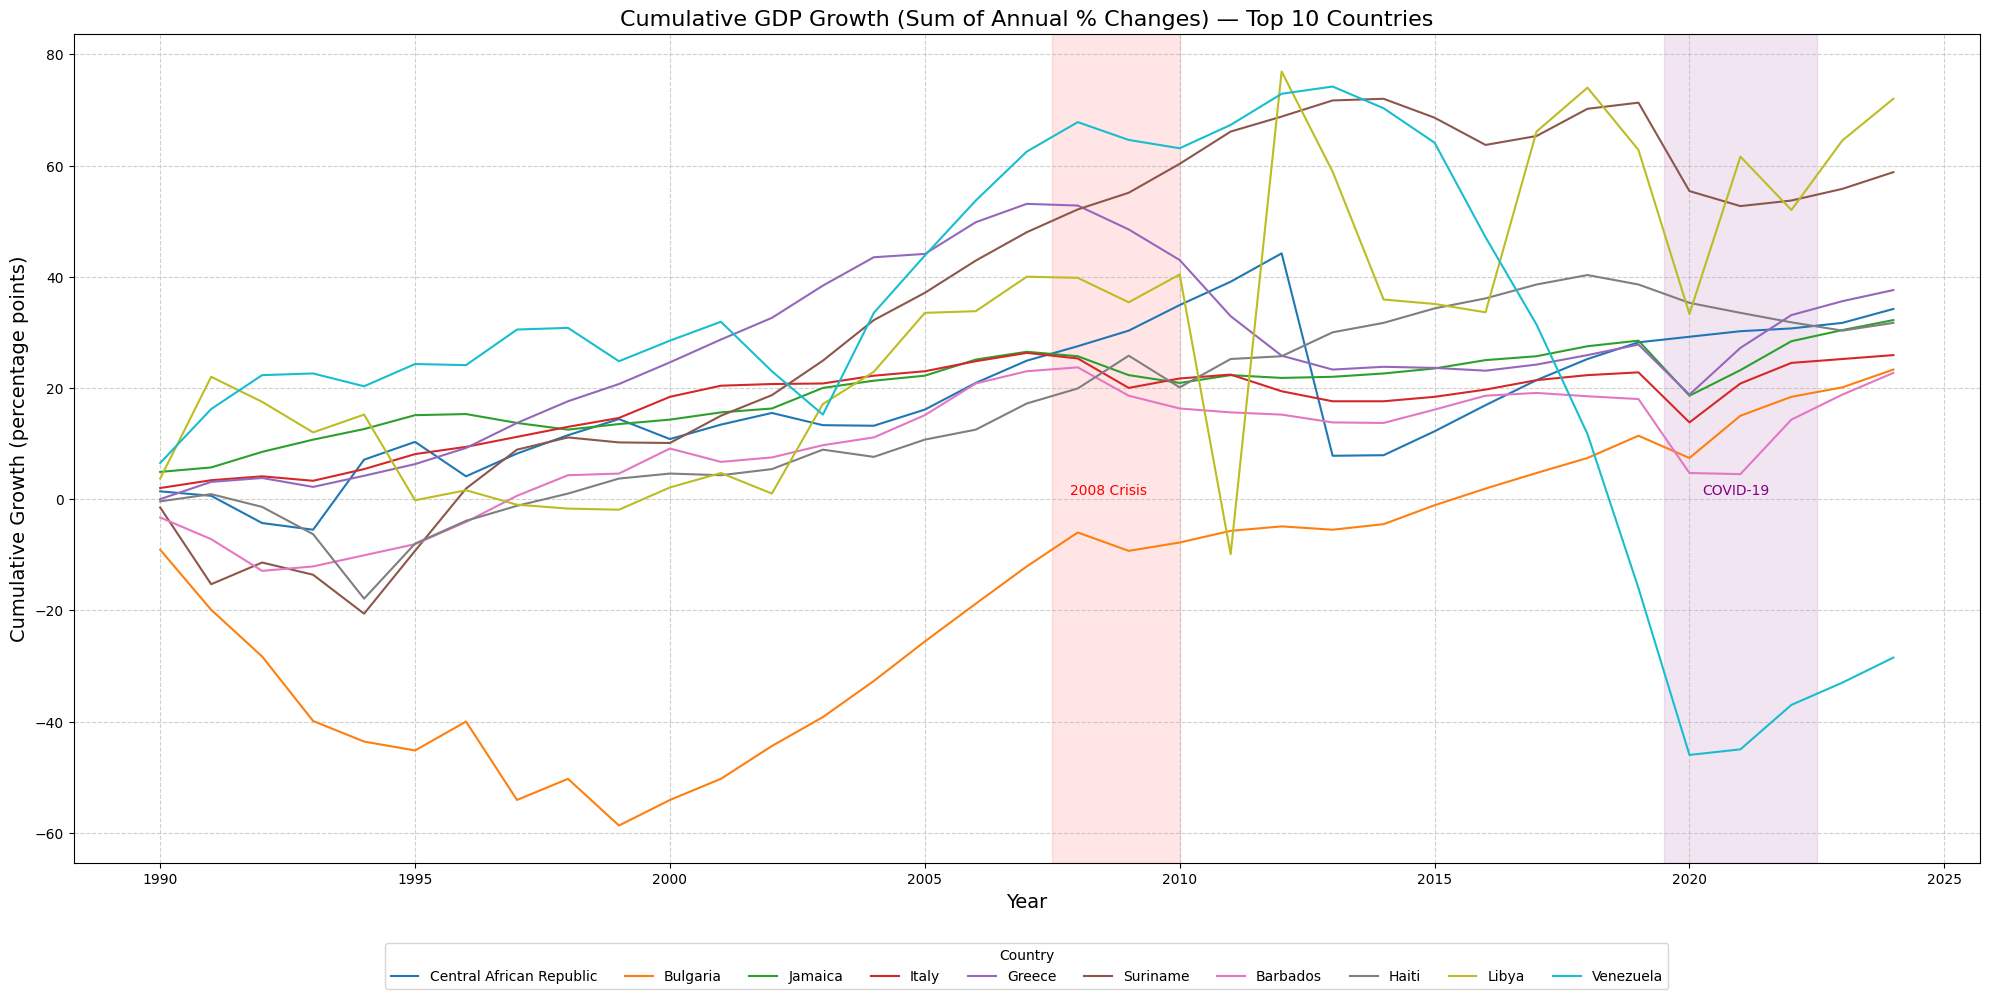

In [10]:
year_cols = [c for c in filtered_gdp.columns if c.isdigit()][10:]

top10_idx = filtered_gdp.nlargest(10, 'sum_gdp').index    # or .nlargest(10, '2024')

Y = filtered_gdp.loc[top10_idx, year_cols].T
Y.index = Y.index.astype(int)

Y_cum = Y.cumsum()

plt.figure(figsize=(20,10))
for country in Y_cum.columns:
    if country == 'India':
        plt.plot(Y_cum.index, Y_cum[country], label=country, linewidth=3, color='green')
    else:
        plt.plot(Y_cum.index, Y_cum[country], label=country)

plt.title("Cumulative GDP Growth (Sum of Annual % Changes) — Top 10 Countries", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Cumulative Growth (percentage points)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(0.5, -0.16), loc="lower center", ncol=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Highlight 2008 Crisis
plt.axvspan(2007.5, 2010, color='red', alpha=0.1, label='2008 Crisis')

# Highlight COVID-19
plt.axvspan(2019.5, 2022.5, color='purple', alpha=0.1, label='COVID-19')

plt.text(2007.85, plt.ylim()[1]*0.01, '2008 Crisis', color='red')
plt.text(2020.25, plt.ylim()[1]*0.01, 'COVID-19', color='purple')

# save this into a png
# data/processed/gdp_growth_trends.png
plt.savefig("../data/processed/lowest_gdp_growth_trends.png", bbox_inches="tight", dpi=300)

# show Chart
plt.show()

### Here are **5 key economic events (Goods as well as Bads) (1980–2024)** for each country

### **Central African Republic**

* 1981 — Military coup; economic disruption
* 1996 — Mutinies trigger IMF suspension
* 2003 — Bozizé coup; donor freeze and decline
* 2013 — Civil war escalates; GDP contracts
* 2019 — IMF Extended Credit Facility supports recovery

### **Bulgaria**

* 1989 — End of communist regime; transition begins
* 1997 — Currency board introduced after hyperinflation crisis
* 2007 — EU accession boosts investment
* 2009 — Global Financial Crisis hits exports
* 2020 — COVID shock and slow recovery

### **Jamaica**

* 1980s — Debt crisis & IMF structural programs
* 1996 — Banking sector crisis
* 2013 — IMF agreement launches fiscal reforms
* 2017 — Record tourism revenues boost GDP
* 2020 — COVID collapse in tourism sector

### **Italy**

* 1992 — Lira crisis; exit from EMS
* 1999 — Euro adoption; restructuring pressures
* 2008–2013 — Eurozone debt crisis; recession
* 2018 — Budget disputes with EU trigger uncertainty
* 2020 — COVID-19 severe economic contraction

### **Greece**

* 1981 — EEC accession (later EU)
* 2001 — Adopts Euro
* 2009 — Sovereign debt crisis erupts
* 2012 — Bailout & austerity deepen recession
* 2018 — Exits bailout programs, slow recovery

### **Suriname**

* 1987 — Democratic restoration after coups
* 2000s — Gold and oil expansion spur growth
* 2015 — Commodity price crash hits exports
* 2020 — Debt crisis; IMF negotiations
* 2023 — Offshore oil discoveries raise outlook

### **Barbados**

* 1991 — Economic crisis; IMF structural adjustment
* 2008 — Global Financial Crisis shocks tourism
* 2013 — Fiscal consolidation program launched
* 2018 — Default & IMF-backed restructuring
* 2020 — Tourism collapse from COVID-19

### **Haiti**

* 1991 — Coup; U.S. sanctions hit economy
* 2004 — Political instability & aid suspensions
* 2010 — Earthquake causes massive GDP loss
* 2016 — Hurricane Matthew devastation
* 2021 — Assassination & instability deepen crisis

### **Libya**

* 1986 — U.S. airstrikes & sanctions
* 2003 — Sanctions lifted; oil exports rebound
* 2011 — Civil war and fall of Gaddafi; economy collapses
* 2016 — Oil output partially recovers
* 2020 — Ongoing conflict and pandemic shocks

### **Venezuela**

* 1989 — Caracazo riots; IMF package
* 1999 — Chávez elected; Bolivarian reforms
* 2013 — Post-Chávez crisis; oil price collapse
* 2016 — Hyperinflation begins
* 2020s — Ongoing sanctions, dollarization, partial rebound
